# Libraries and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [88]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/personal projects/Woven/woven_data.tsv", sep='\t')
df = pd.read_csv("/home/user/Downloads/woven_data.tsv", sep='\t')

In [24]:
!pip install plotly

     |████████████████████████████████| 15.5 MB 9.4 MB/s 


In [3]:
df.head(5)

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,Japan,20,Juurou,Hayashi,10.578594,True,False,True,NaN
1,Male,Japanese,Japan,22,Ryūji,Yamasaki,7.814520,False,False,True,NaN
2,Male,Japanese,Japan,27,Ryūnosuke,Inoue,4.213682,False,False,True,NaN
3,Male,Japanese,Japan,24,Shin,Kobayashi,NaN,False,False,True,NaN
4,Female,Japanese,Japan,21,Ran,Ono,3.248907,False,False,False,NaN


In [4]:
df.columns

Index(['sex', 'lang', 'country', 'age', 'first', 'last', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'notes'],
      dtype='object')

In [72]:
print(df['pass'].value_counts())

False    2665
True     2335
Name: pass, dtype: int64


In [7]:
# Analyzing demographic details of people most likely to pass
passing_df = df[df['pass'] == 1]  # Subset of data where pass = 1

# EDA

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
sex              5000 non-null object
lang             5000 non-null object
country          5000 non-null object
age              5000 non-null int64
first            5000 non-null object
last             5000 non-null object
hours_studied    3018 non-null float64
dojo_class       5000 non-null bool
test_prep        5000 non-null bool
pass             5000 non-null bool
notes            772 non-null object
dtypes: bool(3), float64(1), int64(1), object(6)
memory usage: 327.2+ KB


In [ ]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

notes            84.56
hours_studied    39.64
pass              0.00
test_prep         0.00
dojo_class        0.00
last              0.00
first             0.00
age               0.00
country           0.00
lang              0.00
sex               0.00
dtype: float64

In [ ]:
passing_df.describe()

,age,hours_studied
count,2335.000000,1418.000000
mean,26.651392,5.468335
std,8.019050,3.442488
min,18.000000,0.322662
25%,20.000000,2.946803
50%,24.000000,4.642625
75%,31.000000,7.347131
max,50.000000,24.259314


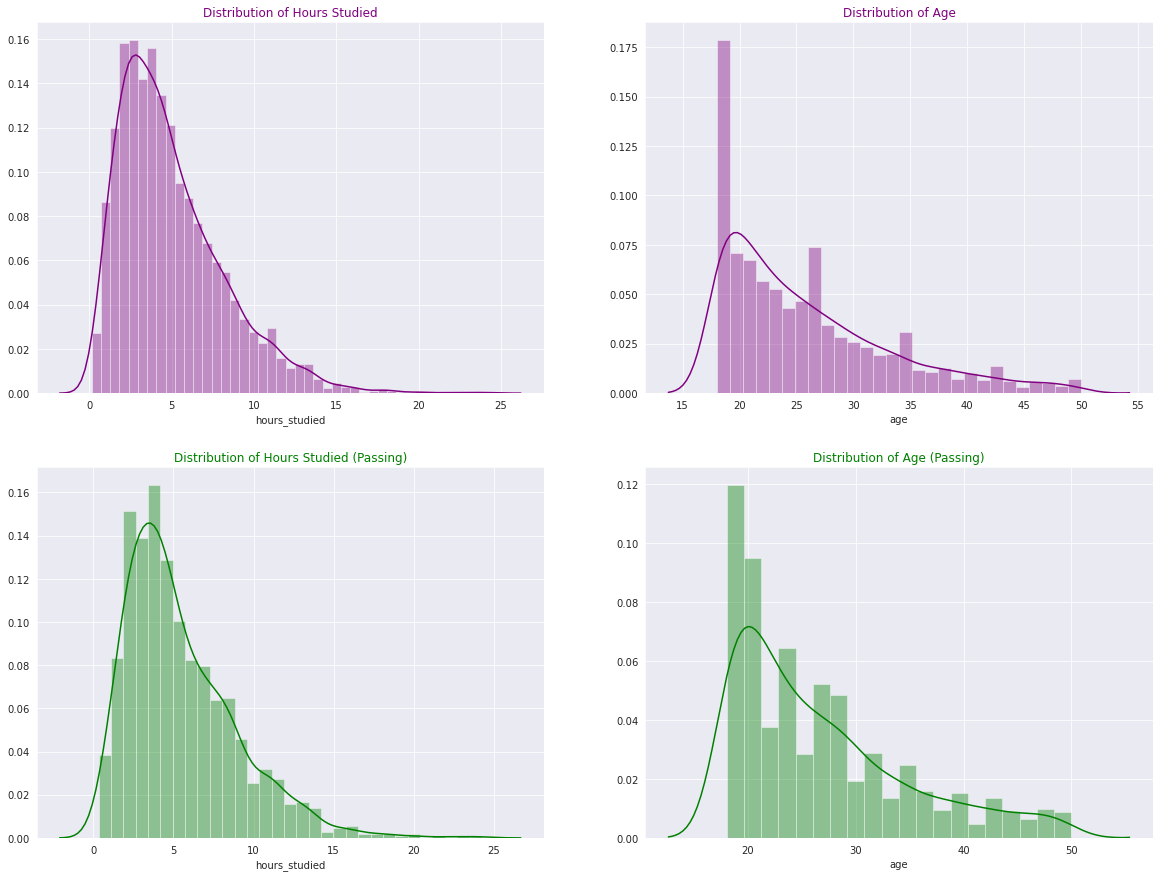

Average study hours of People Who Passed: 5.468334695578223
Overall Average Study hours: 4.964076155049936 

Average age of People Who Passed: 26.65139186295503
Overall Average age: 25.8734


In [22]:
# Value counts

plt.figure(figsize=[20,15])
sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.distplot(df['hours_studied'].dropna(), color='purple')
plt.title('Distribution of Hours Studied', color='purple')

plt.subplot(2,2,2)
sns.distplot(df['age'].dropna(), color='purple')
plt.title('Distribution of Age', color='purple')

plt.subplot(2,2,3)
sns.distplot(passing_df['hours_studied'].dropna(), color='g')
plt.title('Distribution of Hours Studied (Passing)', color='green')

plt.subplot(2,2,4)
sns.distplot(passing_df['age'].dropna(), color='g')
plt.title('Distribution of Age (Passing)', color='green')

plt.show()

# Average age and study hours
print("Average study hours of People Who Passed:", passing_df['hours_studied'].mean())
print("Overall Average Study hours:", df['hours_studied'].mean(),"\n")


print("Average age of People Who Passed:", passing_df['age'].mean())
print("Overall Average age:", df['age'].mean())


In [ ]:
# Check the data types of each attribute
print(df.dtypes)

# Summary statistics of numerical attributes
print(df.describe())

# Proportion of people who passed the test
pass_rate = df['pass'].mean()
print("Pass Rate:", pass_rate)

# Analyzing demographic details of people most likely to pass
passing_df = df[df['pass'] == 1]  # Subset of data where pass = 1

# Demographic analysis
demographic_analysis = passing_df[['sex', 'lang', 'country', 'age']].describe()
print(demographic_analysis)

sex               object
lang              object
country           object
age                int64
first             object
last              object
hours_studied    float64
dojo_class          bool
test_prep           bool
pass                bool
notes             object
dtype: object
               age  hours_studied
count  5000.000000    3018.000000
mean     25.873400       4.964076
std       7.349978       3.203037
min      18.000000       0.139203
25%      20.000000       2.555823
50%      24.000000       4.247235
75%      30.000000       6.660737
max      50.000000      24.259314
Pass Rate: 0.467
               age
count  2335.000000
mean     26.651392
std       8.019050
min      18.000000
25%      20.000000
50%      24.000000
75%      31.000000
max      50.000000


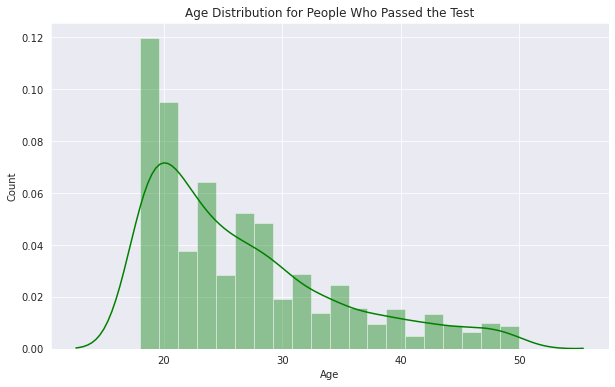

Average Age of People Who Passed: 26.65139186295503
Overall Average Age: 25.8734


In [ ]:
# Histogram of age for people who passed the test
plt.figure(figsize=[10,6])
sns.distplot(passing_df['age'], color='g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for People Who Passed the Test')
plt.show()

# Average age of people who passed
passing_avg_age = passing_df['age'].mean()
overall_avg_age = df['age'].mean()
print("Average Age of People Who Passed:", passing_avg_age)
print("Overall Average Age:", overall_avg_age)

Language proficiency

In [ ]:
# Most common programming language among those who passed
most_common_lang = passing_df['lang'].mode().values[0]
print("Most Common Language among People Who Passed:", most_common_lang)


# Percentage of people who passed for each language
pass_rate_by_lang = df.groupby('lang')['pass'].mean() * 100
print("Pass Rate by Language:")
print(pass_rate_by_lang)


Most Common Language among People Who Passed: Japanese
Pass Rate by Language:
lang
English     48.674242
Finnish     37.777778
French      49.218750
Italian     42.068966
Japanese    46.618598
Spanish     46.969697
Name: pass, dtype: float64


Study hours

Average Study Hours for People Who Passed: 5.468334695578223


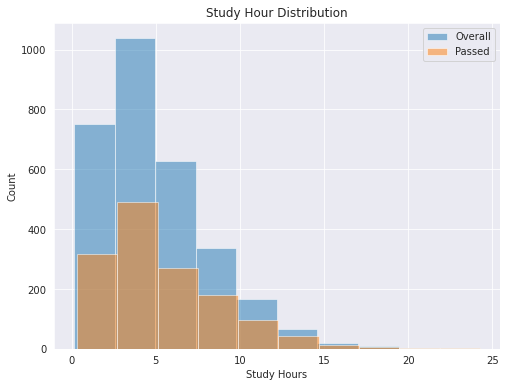

In [ ]:
# Average study hours for people who passed
passing_avg_study_hours = passing_df['hours_studied'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Study hour distribution for people who passed vs overall distribution
plt.figure(figsize=(8, 6))
plt.hist(df['hours_studied'], bins=10, alpha=0.5, label='Overall')
plt.hist(passing_df['hours_studied'], bins=10, alpha=0.5, label='Passed')
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.title('Study Hour Distribution')
plt.legend()
plt.show()


Average Study Hours for People Who Passed: 5.468334695578223


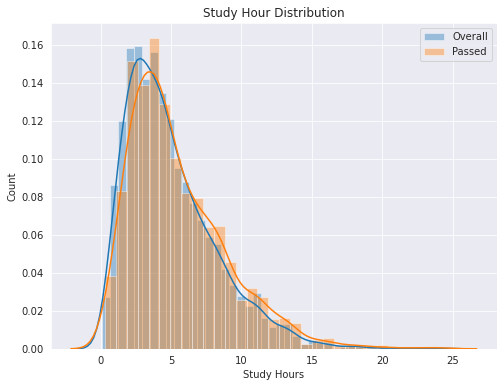

In [ ]:
import seaborn as sns

# Average study hours for people who passed
passing_avg_study_hours = passing_df['hours_studied'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Study hour distribution for people who passed vs overall distribution
plt.figure(figsize=(8, 6))
#sns.distplot(data=df, x='hours_studied', bins=10, alpha=0.5, label='Overall')
#sns.distplot(data=passing_df, x='hours_studied', bins=10, alpha=0.5, label='Passed')
sns.distplot(df['hours_studied'].dropna(), label='Overall')
sns.distplot(passing_df['hours_studied'].dropna(), label='Passed')
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.title('Study Hour Distribution')
plt.legend()
plt.show()

Average Study Hours for People Who Passed: 5.468334695578223


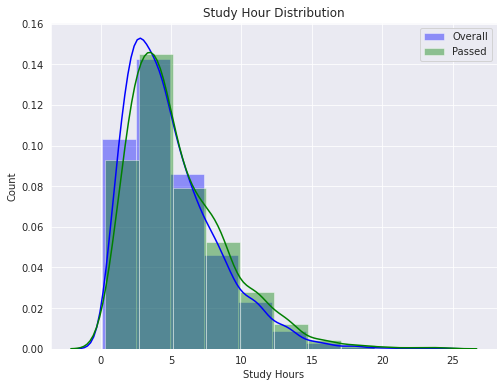

In [ ]:
import seaborn as sns

# Average study hours for people who passed
passing_avg_study_hours = passing_df['hours_studied'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Study hour distribution for people who passed vs overall distribution
plt.figure(figsize=(8, 6))
sns.distplot(df['hours_studied'].dropna(), bins=10, color='blue', label='Overall')
sns.distplot(passing_df['hours_studied'].dropna(), bins=10, color='green', label='Passed')
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.title('Study Hour Distribution')
plt.legend()
plt.show()


Optimum Study Hours: 0.3226619002445695
Correlation between Study Hours and Pass: 0.14823181383671105


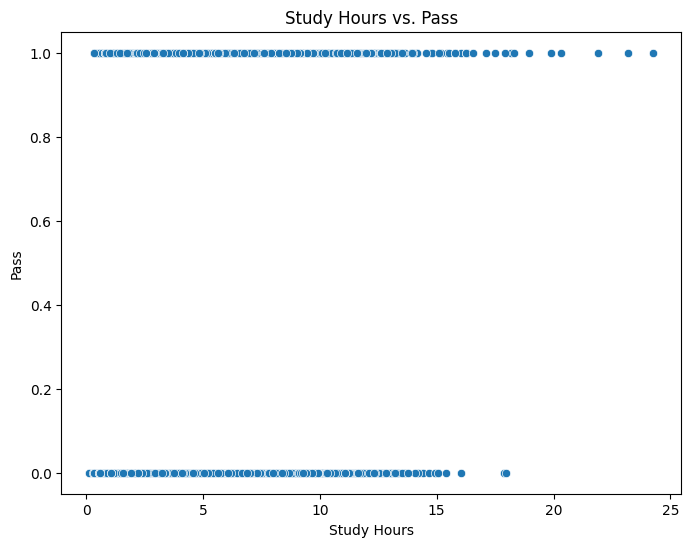

In [ ]:
import numpy as np
import seaborn as sns

# Optimum study hours
optimum_hours = df.groupby('hours_studied')['pass'].mean().idxmax()
print("Optimum Study Hours:", optimum_hours)

# Correlation between study hours and people who passed
correlation = df['hours_studied'].corr(df['pass'])
print("Correlation between Study Hours and Pass:", correlation)

# Scatter plot of study hours vs. pass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='hours_studied', y='pass')
plt.xlabel('Study Hours')
plt.ylabel('Pass')
plt.title('Study Hours vs. Pass')
plt.show()


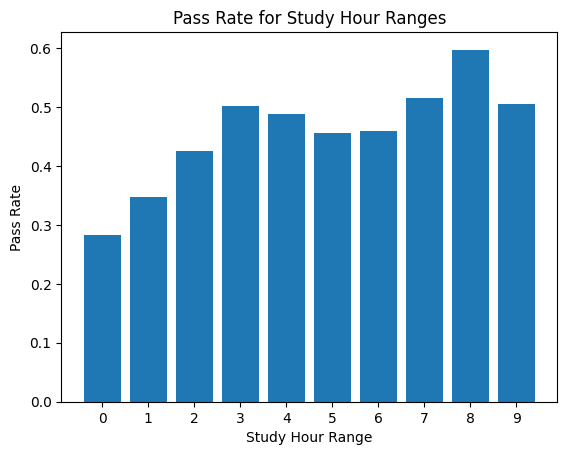

Correlation between Study Hours and Pass: 0.14823181383671105


In [ ]:
# Define study hour ranges
study_hour_ranges = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate pass rate for each study hour range
pass_rates = []
for i in range(len(study_hour_ranges) - 1):
    lower_bound = study_hour_ranges[i]
    upper_bound = study_hour_ranges[i + 1]
    pass_rate = df[(df['hours_studied'] >= lower_bound) & (df['hours_studied'] < upper_bound)]['pass'].mean()
    pass_rates.append(pass_rate)

# Plot pass rates for study hour ranges
plt.bar(range(len(study_hour_ranges) - 1), pass_rates)
plt.xlabel('Study Hour Range')
plt.ylabel('Pass Rate')
plt.title('Pass Rate for Study Hour Ranges')
plt.xticks(range(len(study_hour_ranges) - 1), study_hour_ranges[:-1])
plt.show()

# Correlation between study hours and people who passed
correlation = df['hours_studied'].corr(df['pass'])
print("Correlation between Study Hours and Pass:", correlation)


## 2.

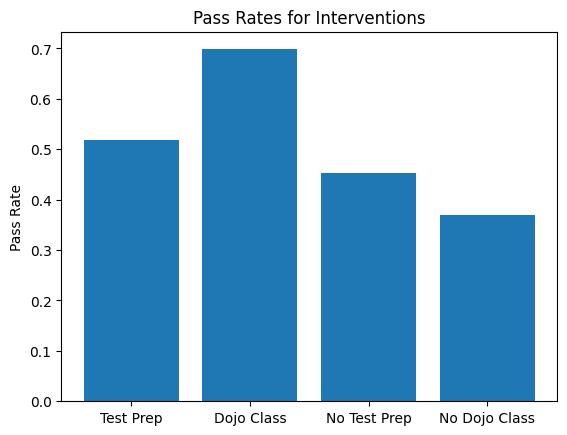

In [ ]:
# Pass rate for individuals who took the test prep course
prep_pass_rate = df[df['test_prep'] == 1]['pass'].mean()

# Pass rate for individuals who attended the Dojo class
dojo_pass_rate = df[df['dojo_class'] == 1]['pass'].mean()

# Pass rate for individuals who did not take the test prep course
no_prep_pass_rate = df[df['test_prep'] == 0]['pass'].mean()

# Pass rate for individuals who did not attend the Dojo class
no_dojo_pass_rate = df[df['dojo_class'] == 0]['pass'].mean()

# Plotting the pass rates
labels = ['Test Prep', 'Dojo Class', 'No Test Prep', 'No Dojo Class']
pass_rates = [prep_pass_rate, dojo_pass_rate, no_prep_pass_rate, no_dojo_pass_rate]

plt.bar(labels, pass_rates)
plt.ylabel('Pass Rate')
plt.title('Pass Rates for Interventions')
plt.show()


In [29]:
df.keys()

Index(['sex', 'lang', 'country', 'age', 'first', 'last', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'notes'],
      dtype='object')

In [33]:
# Calculate pass rate for each language
pass_rate = df.groupby('lang')['pass'].apply(lambda x: (x == 'Pass').mean())

# Identify the language with the highest pass rate
highest_pass_language = pass_rate.idxmax()
highest_pass_rate = pass_rate.max()

# Print the results
print("Language with the highest pass rate:", highest_pass_language)
print("Pass rate:", highest_pass_rate)

Language with the highest pass rate: English
Pass rate: 0.0


/home/user/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [41]:
df.head(1)

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,Japan,20,Juurou,Hayashi,10.578594,True,False,True,NaN


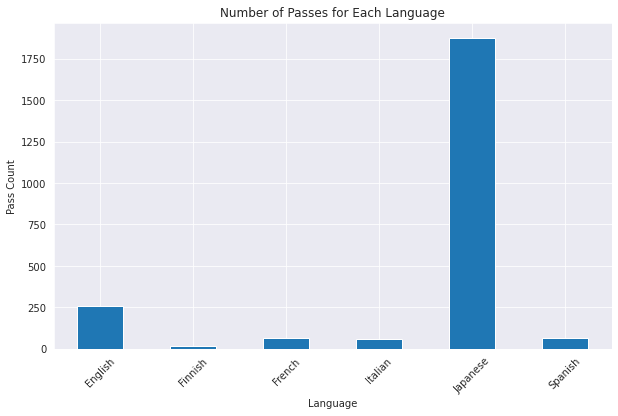

In [42]:
# Calculate pass ratio for each language
pass_counts = df[df['pass'] == True].groupby('lang').size()
pass_ratio = df.groupby('lang')['pass'].apply(lambda x: (x == True).mean())

# Plot the pass ratio
plt.figure(figsize=[10, 6])
pass_counts.plot(kind='bar')
plt.title('Number of Passes for Each Language')
plt.xlabel('Language')
plt.ylabel('Pass Count')
plt.xticks(rotation=45)
plt.show()

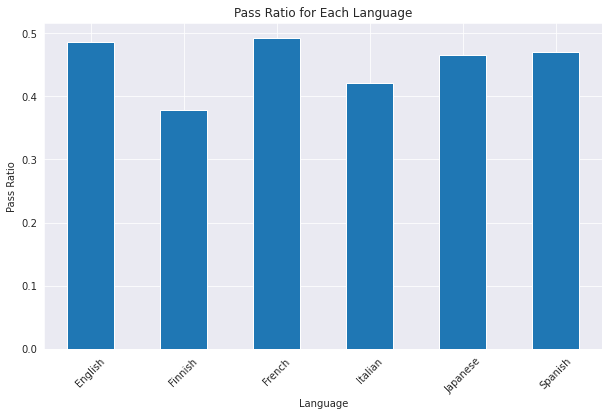

In [45]:
pass_ratio = df.groupby('lang')['pass'].apply(lambda x: (x == True).mean())

# Plot the pass ratio
plt.figure(figsize=[10, 6])
pass_ratio.plot(kind='bar')
plt.title('Pass Ratio for Each Language')
plt.xlabel('Language')
plt.ylabel('Pass Ratio')
plt.xticks(rotation=45)
plt.show()

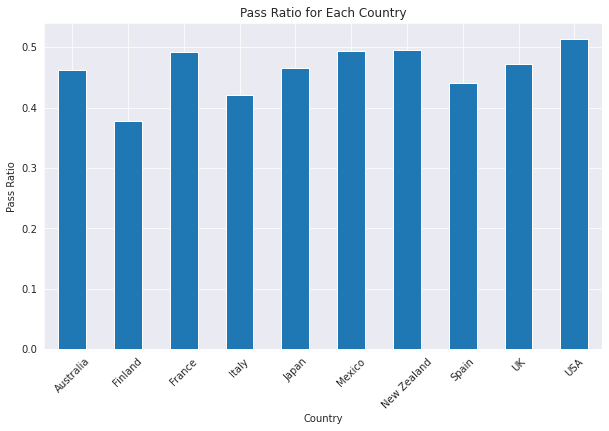

In [49]:
pass_ratio = df.groupby('country')['pass'].apply(lambda x: (x == True).mean())

# Plot the pass ratio
plt.figure(figsize=[10, 6])
pass_ratio.plot(kind='bar')
plt.title('Pass Ratio for Each Country')
plt.xlabel('Country')
plt.ylabel('Pass Ratio')
plt.xticks(rotation=45)
plt.show()

In [40]:
pass_counts

Series([], dtype: int64)

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['lang'], df['pass'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("p-value:", p_value)


Chi-square value: 3.8561009764322165
p-value: 0.5703144804818312


In [30]:
import plotly.express as px
fig=px.scatter_matrix(df,
    dimensions=['sex', 'lang','age', 'hours_studied', 'dojo_class','test_prep'],
    color="pass")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white",
)

fig.show()

<AxesSubplot:title={'center':'hours studied and age for each class'}, xlabel='hours_studied', ylabel='age'>

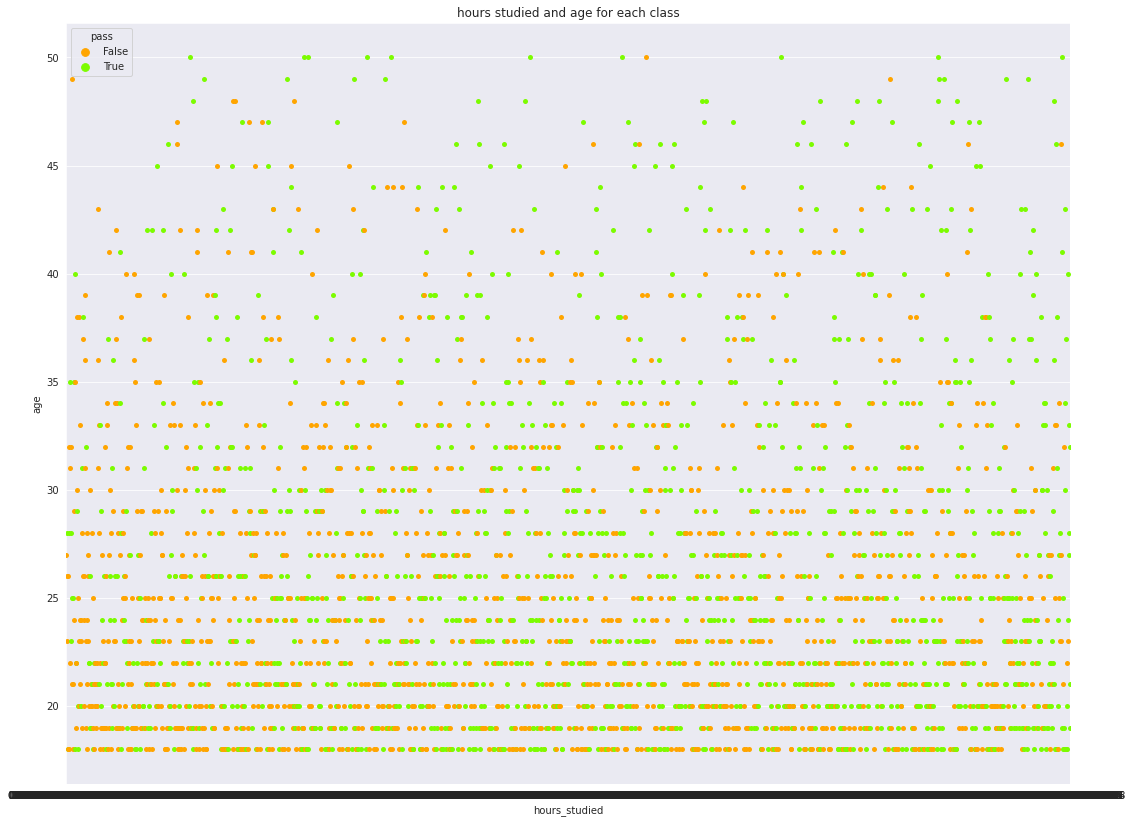

In [48]:
#Plot Size
plt.figure(figsize=(18,14))
#Plot Title
plt.title("Studied Hours and age for each class")
#Plot
sns.swarmplot(x=df["hours_studied"],y=df["age"], hue=df["pass"],palette=("orange","lawngreen"))

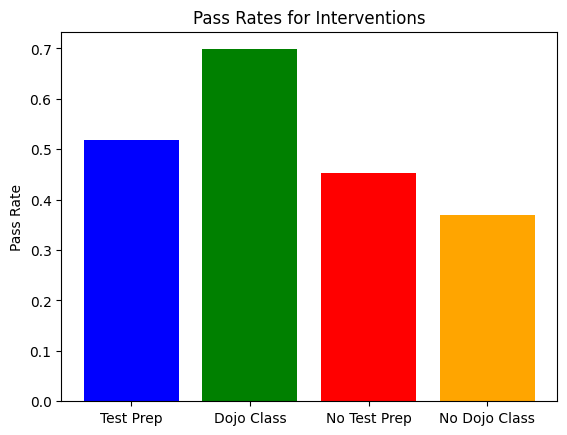

In [ ]:
# Pass rate for individuals who took the test prep course
prep_pass_rate = df[df['test_prep'] == 1]['pass'].mean()

# Pass rate for individuals who attended the Dojo class
dojo_pass_rate = df[df['dojo_class'] == 1]['pass'].mean()

# Pass rate for individuals who did not take the test prep course
no_prep_pass_rate = df[df['test_prep'] == 0]['pass'].mean()

# Pass rate for individuals who did not attend the Dojo class
no_dojo_pass_rate = df[df['dojo_class'] == 0]['pass'].mean()

# Plotting the pass rates
labels = ['Test Prep', 'Dojo Class', 'No Test Prep', 'No Dojo Class']
pass_rates = [prep_pass_rate, dojo_pass_rate, no_prep_pass_rate, no_dojo_pass_rate]
colors = ['blue', 'green', 'red', 'orange']

plt.bar(labels, pass_rates, color=colors)
plt.ylabel('Pass Rate')
plt.title('Pass Rates for Interventions')
plt.show()


In [ ]:
# Pass rate for individuals who took the test prep course
prep_pass_rate = df[df['test_prep'] == 1]['pass'].mean()

# Pass rate for individuals who attended the Dojo class
dojo_pass_rate = df[df['dojo_class'] == 1]['pass'].mean()

# Pass rate for individuals who did not take the test prep course
no_prep_pass_rate = df[df['test_prep'] == 0]['pass'].mean()

# Pass rate for individuals who did not attend the Dojo class
no_dojo_pass_rate = df[df['dojo_class'] == 0]['pass'].mean()

# Calculate the percentage increase in pass rates for each intervention
prep_percentage_increase = (prep_pass_rate - no_prep_pass_rate) / no_prep_pass_rate * 100
dojo_percentage_increase = (dojo_pass_rate - no_dojo_pass_rate) / no_dojo_pass_rate * 100

# Print the results
print("Percentage Increase in Pass Rates:")
print("Test Prep:", prep_percentage_increase)
print("Dojo Class:", dojo_percentage_increase)


Percentage Increase in Pass Rates:
Test Prep: 14.300075341024435
Dojo Class: 88.99252569293056


## 3.

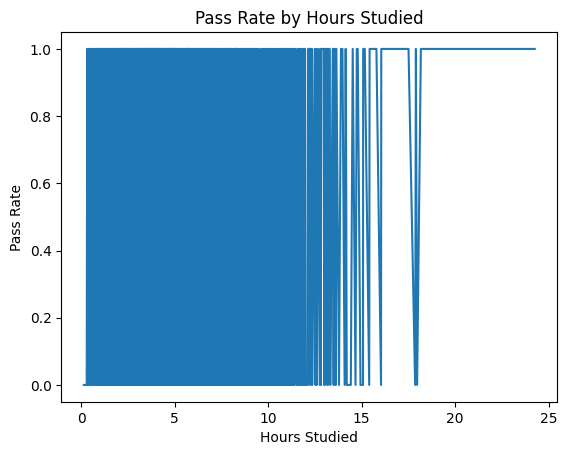

In [ ]:
# Group the dataset by hours studied and calculate the pass rate for each group
pass_rate_by_hours = df.groupby('hours_studied')['pass'].mean()

# Plot the pass rate as a function of hours studied
plt.plot(pass_rate_by_hours.index, pass_rate_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Pass Rate')
plt.title('Pass Rate by Hours Studied')
plt.show()


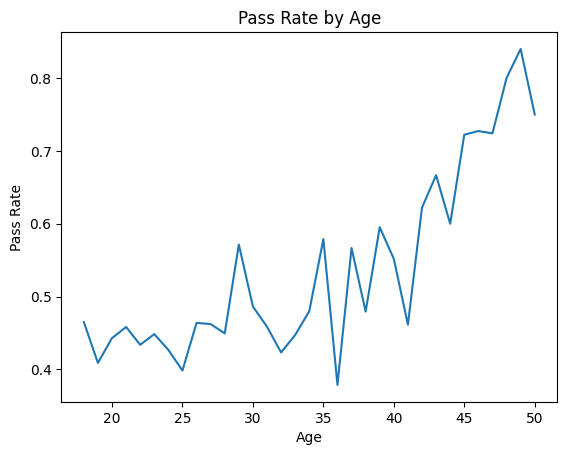

In [ ]:
# Group the dataset by age and calculate the pass rate for each age group
pass_rate_by_age = df.groupby('age')['pass'].mean()

# Plot the pass rate as a function of age
plt.plot(pass_rate_by_age.index, pass_rate_by_age.values)
plt.xlabel('Age')
plt.ylabel('Pass Rate')
plt.title('Pass Rate by Age')
plt.show()


## 4.

Model Accuracy: 0.659
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.72      0.68       508
        True       0.67      0.60      0.63       492

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



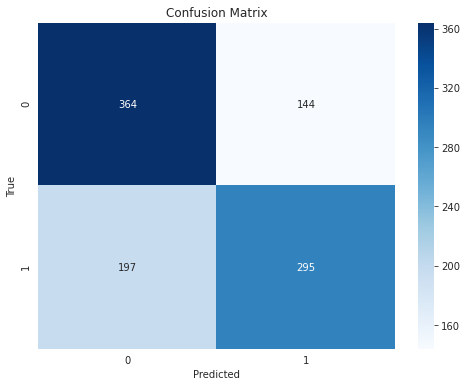

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("/home/user/Downloads/woven_data.tsv", sep='\t')

# Select the relevant features and target variable
features = ['sex', 'lang', 'country', 'age', 'hours_studied', 'dojo_class', 'test_prep']
target = 'pass'

# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)


# Drop rows with NaN values
#df = df.dropna()

y = df['pass']
X = df.drop(['pass'], axis = 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = RandomForestClassifier(n_estimators= 1000)
model = HistGradientBoostingClassifier(max_iter= 200,min_samples_leaf=30)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/personal projects/Woven/woven_data.tsv", sep='\t')

# Select the relevant features and target variable
features = ['sex', 'lang', 'country', 'age', 'hours_studied', 'dojo_class', 'test_prep']
target = 'pass'

# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)



y = df['pass']
X = df.drop(['pass'], axis = 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

### Testing multiple models

In [82]:
# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)

df= df.dropna()

y = df['pass']
X = df.drop(['pass'], axis = 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Machine Learning Libraries
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve, classification_report
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import random



    # confusion matrix
def graphs_cm (name, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  lr_asr = accuracy_score(y_test, y_pred)
  print("Accuracy:",name, lr_asr, "\n")
  print(classification_report(y_test, y_pred))

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
  ax1.set_title(name)
  ax1.set_ylabel("Actual")
  ax1.set_xlabel("Predicted")
  plt.show()

# ROC AUC
def roc_auc(name, y_test,y_pred):
  skplt.metrics.plot_roc(y_test, y_pred, title = name)
  plt.show()

#training function for cross validation
def train_test(X_train,y_train,X_test,y_test, models):
  col_list = []

  for col in X_train:
      if col != "label":
          col_list.append(col)
  for name, model in models:
      globals()[model]= model.fit(X_train, y_train)
      y_pred = globals()[model].predict(X_test)
      globals()[name]=name
      nom=[]
      nom.append(name)

      #print("%s -> ACC: %%%.2f" % (globals()[name], metrics.accuracy_score(y_test, y_pred) * 100))
      #print(classification_report(y_test, y_pred))
      graphs_cm(globals()[name],y_test,y_pred)
      #graphs_variable_importance(globals()[name], col_list)

def moderu():
  models = []
  models.append(('Logistic Regression', LogisticRegression(solver='liblinear',max_iter=500)))
  models.append(('Decision Tree (CART)', DecisionTreeClassifier()))
  models.append(('SVM', SVC(kernel='poly', random_state=None, gamma='scale', probability=True)))
  models.append(('K-NN', KNeighborsClassifier()))
  models.append(('Ada Boost Classifier', AdaBoostClassifier()))
  models.append(('Bagging Classifier', BaggingClassifier(n_estimators=50)))
  models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=100,warm_start=True)))
  #models.append(('MLP Classifier', MLPClassifier(max_iter=500, early_stopping=True)))
  models.append(('Gaussian naive_bayes', GaussianNB()))

  return models


from sklearn.model_selection import cross_val_score
models = moderu()
results=pd.DataFrame(columns=['model', 'score', 'std score'])
for name,model in models:
  scores = cross_val_score(model, X_train, y_train, cv=5)
  #y_pred = model.predict(X_test)

# scores

# The mean score
  print(name,"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  results.loc[len(results)] =[name,scores.mean(),scores.std() * 2 ]
  #graphs_cm(name,y_test,y_pred)

print(results)



Logistic Regression Accuracy: 0.66 (+/- 0.04)
Decision Tree (CART) Accuracy: 0.60 (+/- 0.03)
SVM Accuracy: 0.60 (+/- 0.03)
K-NN Accuracy: 0.61 (+/- 0.05)
Ada Boost Classifier Accuracy: 0.65 (+/- 0.07)
Bagging Classifier Accuracy: 0.61 (+/- 0.01)
Random Forest Classifier Accuracy: 0.63 (+/- 0.02)
Gaussian naive_bayes Accuracy: 0.64 (+/- 0.05)
                      model     score  std score
0       Logistic Regression  0.663200   0.039953
1      Decision Tree (CART)  0.603144   0.033173
2                       SVM  0.596510   0.029889
3                      K-NN  0.606034   0.050117
4      Ada Boost Classifier  0.649939   0.069129
5        Bagging Classifier  0.610190   0.014671
6  Random Forest Classifier  0.627587   0.023900
7      Gaussian naive_bayes  0.639602   0.053354


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

"""df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/personal projects/Woven/woven_data.tsv", sep='\t')

# Select the relevant features and target variable
features = ['sex', 'lang', 'country', 'age', 'hours_studied', 'dojo_class', 'test_prep']
target = 'pass'

# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)


# Drop rows with NaN values
df = df.dropna()

y = df['pass']
X = df.drop(['pass'], axis = 1)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""

# Define a dictionary to store the results
results = {}

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=150,),
    'Logistic Regression': LogisticRegression(max_iter = 500),
    'Decision Tree': DecisionTreeClassifier(max_depth=20),
    'Ada Boost': AdaBoostClassifier(n_estimators=100),
    'Bagging classifier': BaggingClassifier(n_estimators=50),
    'Gaussian Naive Bayes': GaussianNB()

}

# Iterate over the models
for model_name, model in models.items():
    # Perform cross-validation and calculate accuracy
    scores = cross_val_score(model, X, y, cv=10)
    results[model_name] = scores

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Print the results table
print(results_df.mean())

# Identify the best performing model
best_model = results_df.mean().idxmax()
print(f"Best Performing Model is : {best_model} ")

Random Forest           0.634197
Logistic Regression     0.666319
Decision Tree           0.596070
Ada Boost               0.653401
Bagging classifier      0.621276
Gaussian Naive Bayes    0.632854
dtype: float64
Best Performing Model is : Logistic Regression 


In [63]:
results_df.mean()

Random Forest           0.631546
Logistic Regression     0.664668
Decision Tree           0.597077
Ada Boost               0.660370
Bagging classifier      0.621934
Gaussian Naive Bayes    0.628224
dtype: float64

#### PCA

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [86]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Accuracy: model 0.5049668874172185 

              precision    recall  f1-score   support

       False       0.51      0.98      0.67       309
        True       0.17      0.00      0.01       295

    accuracy                           0.50       604
   macro avg       0.34      0.49      0.34       604
weighted avg       0.34      0.50      0.35       604



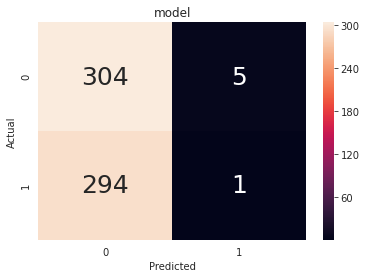

In [87]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

graphs_cm('model',y_test,y_pred)